**Data Generation**

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [180]:
np.random.seed(42)
X = np.random.randn(500, 2) 
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)  

**Data Visualization**

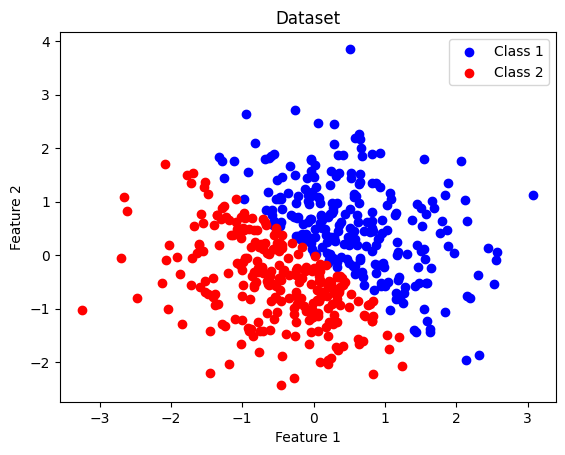

In [181]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset')
plt.legend()
plt.show()

Splitting dataset

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Perceptron Implementation**

In [183]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate  # Learning rate
        self.n_iters = n_iters  # Number of iterations
        self.weights = None  # Weights
        self.bias = None  # Bias

    def step_function(self, x):      
        return np.where(x >= 0, 1, -1)  

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.n_iters):
            errors = 0  
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.step_function(linear_output)

                if y_pred != y[idx]: 
                    update = self.lr * y[idx]
                    self.weights += update * x_i
                    self.bias += update
                    errors += 1

            if errors == 0:
                break

            print(f"Epoch {epoch+1}/{self.n_iters}, Errors: {errors}") 

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step_function(linear_output)

In [184]:
perceptron = Perceptron(learning_rate=0.01, n_iters=100)
perceptron.fit(X_train, y_train)

Epoch 1/100, Errors: 11
Epoch 2/100, Errors: 10
Epoch 3/100, Errors: 16
Epoch 4/100, Errors: 12
Epoch 5/100, Errors: 9
Epoch 6/100, Errors: 7
Epoch 7/100, Errors: 7
Epoch 8/100, Errors: 7
Epoch 9/100, Errors: 5
Epoch 10/100, Errors: 7
Epoch 11/100, Errors: 6
Epoch 12/100, Errors: 7
Epoch 13/100, Errors: 4
Epoch 14/100, Errors: 8
Epoch 15/100, Errors: 8
Epoch 16/100, Errors: 8
Epoch 17/100, Errors: 8
Epoch 18/100, Errors: 8
Epoch 19/100, Errors: 4
Epoch 20/100, Errors: 9
Epoch 21/100, Errors: 7
Epoch 22/100, Errors: 4
Epoch 23/100, Errors: 9
Epoch 24/100, Errors: 8
Epoch 25/100, Errors: 2
Epoch 26/100, Errors: 2
Epoch 27/100, Errors: 2
Epoch 28/100, Errors: 8
Epoch 29/100, Errors: 4
Epoch 30/100, Errors: 2
Epoch 31/100, Errors: 2
Epoch 32/100, Errors: 2
Epoch 33/100, Errors: 7
Epoch 34/100, Errors: 4
Epoch 35/100, Errors: 5
Epoch 36/100, Errors: 2
Epoch 37/100, Errors: 2
Epoch 38/100, Errors: 5
Epoch 39/100, Errors: 5
Epoch 40/100, Errors: 4
Epoch 41/100, Errors: 2
Epoch 42/100, Errors:

**Visualization**

In [185]:
def plot_decision_boundary(X, y, model):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.8)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class 2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

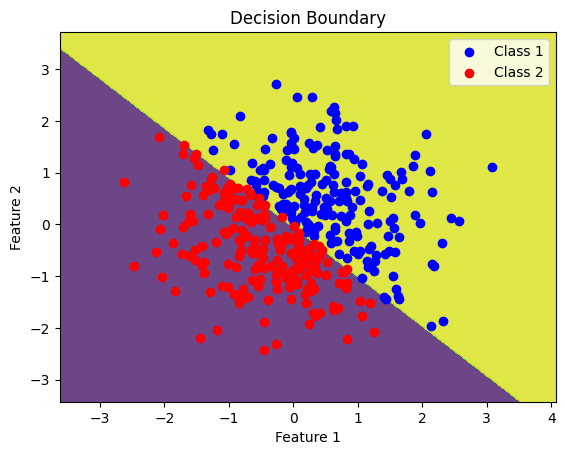

Accuracy on test data: 97.00%


In [186]:
plot_decision_boundary(X_train, y_train, perceptron)
y_pred = perceptron.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")